<h1>Newton's method -- polynomials</h1>
<h2>Code</h2>

In [3]:
var('x, z')

def find_m(P):
    for coef, deg in reversed(P.coeffs()):
        if coef < 0:
            return P.degree(P.variables()[0]) - deg
    return None

def find_bound(P):
    if P.coeffs()[-1][0] < 0:
        P = -P
    m = find_m(P)
    if m is None:
        return None
    else:
        a0 = P.coeffs()[-1][0]
        a = max([abs(coef) for (coef, deg) in P.coeffs() if coef < 0])
        return 1 + (a / a0)^(1/m)

def find_root_bounds(P):
    bounds = []
    for subst in (-z, -1/z, 1/z, z):
        bound = find_bound(P(subst))
        if bound is not None:
            bounds.append(subst(z=bound))
    return zip(bounds[::2], bounds[1::2])

def find_altern_interval(P, I, step=0.1):
    # Assuming the function intersects the interval in at most one point
    # (including both endpoints)
    intervals = []
    cur = I[0]
    while cur <= I[1]:
        a = cur
        b = cur+step
        if P(a) * P(b) < 0:
            intervals.append((a, b))
        elif P(a) == 0:
            intervals.append((a-step, b))
        cur += step
    return intervals

def find_roots_newton(P, x, iter=0, max_iter=30, eps=10e-6, verbose=False):
    if verbose:
        html('%s\t%s\t%s' % (iter, x, P(x)))
    x_next = x - P(x) / diff(P)(x)
    if iter == max_iter:
        print('WARNING: max_iter reached (%s)' % max_iter)
        return x_next
    elif abs(x - x_next) <= eps:
        return x_next
    else:
        return find_roots_newton(P, x_next, iter+1, verbose=verbose)

def find_roots(P, step=0.1, bounds=False, verbose=False):
    if verbose:
        html('Finding the roots of')
        show(P)
    roots = []
    if not bounds:
        bounds = find_root_bounds(P)
    if verbose:
        html('Root bounds:')
        show(bounds)
        html('Graph of the function at the interval given by the root bounds:')
        plot(P, bounds[0][0], bounds[-1][-1], figsize=6).show()
    for I in bounds:
        for J in find_altern_interval(P, I, step):
            x0 = J[0] + (J[1] - J[0]) / 2
            if verbose:
                html('Running Newton\'s algorithm on')
                show(J)
            roots.append(find_roots_newton(P, x0, verbose=verbose))
            if verbose:
                html('')
    if verbose:
        if roots:
            html('Roots found:')
            show(roots)
            html('Roots calculated by Sage:')
            try:
#                show([[r.n() for r in tup] for tup in P.roots()])
                show(P.roots())
            except RuntimeError:
                show('None')
    return roots

<h2>Tests</h2>

In [4]:
#P(x) = 9*x^4 - 9*x^2 - 36*x + 1
#
#assert(find_m(P) == 2)
#assert(find_bound(P) == 3)
#assert(find_m(P(x=1/z)) == 1)
#assert(find_bound(P(x=1/z)) == 37)
#assert(find_m(P(x=-z)) == 2)
#assert(find_bound(P(x=-z)) == 2)
#assert(find_m(P(x=-1/z)) == 2)
#assert(find_bound(P(x=-1/z)) == 4)
##print(find_root_bounds(P))
#
#bounds = find_root_bounds(P)
#intervals = find_altern_interval(P, bounds[1], step=0.5)
#assert([(round(a, 5), round(b, 5)) for (a, b) in intervals] == [(0.02703, 0.52703), (1.52703, 2.02703)])
#
#root = find_roots_newton(P, 1.6, max_iter=20, eps=10e-6)
#assert(round(root, 5) == 1.78914)
#
#roots = find_roots(P, verbose=True)
#assert([round(r, 5) for r in roots] == [0.02759, 1.78914])
#
##plot(P, bounds[0][0], bounds[-1][-1])

<h2>Solutions For The Given Equations</h2>

<p>$$ P(x) = x^3 - 2.25x^2 - 0.25x + 1.5 $$</p>

Finding the roots of

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:57: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


x |--> x^3 - 2.25000000000000*x^2 - 0.250000000000000*x + 1.50000000000000

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:10: DeprecationWarning: coeffs is deprecated. Please use coefficients instead.
See http://trac.sagemath.org/17438 for details.
/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: coeffs is deprecated. Please use coefficients instead.
See http://trac.sagemath.org/17438 for details.
/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:16: DeprecationWarning: coeffs is deprecated. Please use coefficients instead.
See http://trac.sagemath.org/17438 for details.
/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:17: DeprecationWarning: coeffs is deprecated. Please use coefficients instead.
See http://trac.sagemath.org/17438 for details.


Root bounds:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:63: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


[(-2.224744871391589, -0.4494897427831781), (0.4, 3.25)]

Graph of the function at the interval given by the root bounds:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:65: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


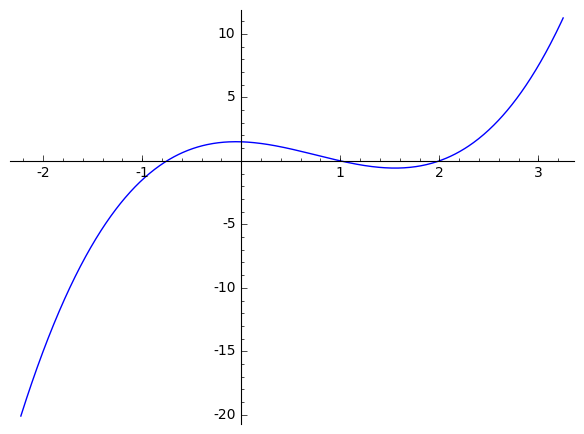

Running Newton's algorithm on

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:71: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


(-0.8247448713915879, -0.7247448713915879)

0	-0.7747448713915879	-0.121855234041903

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:45: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


1	-0.7505530413782538	-0.00266288814844423

2	-0.7500002857687498	-1.37526247584452e-6

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:75: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


Running Newton's algorithm on

(0.9999999999999999, 1.0999999999999999)

0	1.0499999999999998	-0.0854999999999995

1	0.9987256371814095	0.00223135086341253

2	0.9999993071198756	1.21254057772191e-6

Running Newton's algorithm on

(1.9000000000000006, 2.0000000000000004)

0	1.9500000000000006	-0.128250000000000

1	2.00383001049318	0.0105875937150088

2	2.000019836495735	0.0000545518388523902

3	2.0000000005365495	1.47551126872258e-9

Roots found:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:78: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


[-0.7500000000000764, 0.9999999999997943, 2.0]

Roots calculated by Sage:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:80: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


[(1, 1), (2, 1), (-3/4, 1)]

[-0.7500000000000764, 0.9999999999997943, 2.0]

In [5]:
P(x) = x^3 - 2.25*x^2 - 0.25*x + 1.5
find_roots(P, verbose=True)

<p>$$ P(x) = x^4 - 2.9x^3 + 0.1x^2 + 5.8x - 4.2 $$</p>

Finding the roots of

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:57: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


x |--> x^4 - 2.90000000000000*x^3 + 0.100000000000000*x^2 + 5.80000000000000*x - 4.20000000000000

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:10: DeprecationWarning: coeffs is deprecated. Please use coefficients instead.
See http://trac.sagemath.org/17438 for details.
/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: coeffs is deprecated. Please use coefficients instead.
See http://trac.sagemath.org/17438 for details.
/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:16: DeprecationWarning: coeffs is deprecated. Please use coefficients instead.
See http://trac.sagemath.org/17438 for details.
/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:17: DeprecationWarning: coeffs is deprecated. Please use coefficients instead.
See http://trac.sagemath.org/17438 for details.


Root bounds:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:63: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


[(-2.796701779143053, -0.5461648666745926), (0.42, 5.2)]

Graph of the function at the interval given by the root bounds:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:65: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


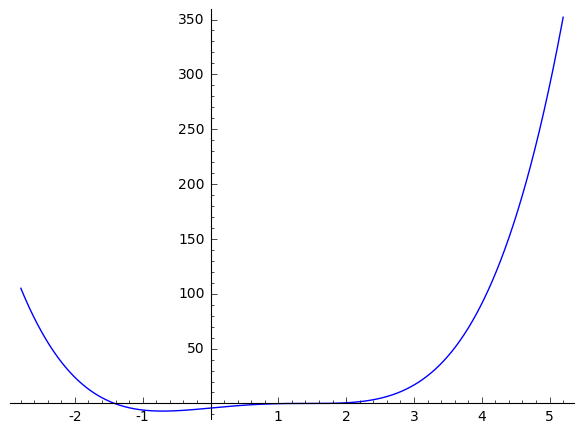

Running Newton's algorithm on

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:71: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


(-1.4167017791430692, -1.4067017791430692)

0	-1.411701779143069	-0.0581108798675203

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:45: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


1	-1.414220223209614	0.000154509518134560

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:75: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


Running Newton's algorithm on

(1.3900000000000008, 1.4100000000000008)

0	1.4000000000000008	0.000000000000000

Running Newton's algorithm on

(1.4100000000000008, 1.4200000000000008)

0	1.415000000000001	-2.83687500068908e-6

1	1.414246313761773	-1.13170972149135e-7

2	1.4142136254154412	-2.17420748072072e-10

Running Newton's algorithm on

(1.4900000000000009, 1.510000000000001)

0	1.5000000000000009	0.000000000000000

Roots found:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:78: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


[-1.41421356241977, 1.4000000000000008, 1.4142135623732666, 1.5000000000000009]

Roots calculated by Sage:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:80: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


[(3/2, 1), (7/5, 1), (-sqrt(2), 1), (sqrt(2), 1)]

[-1.41421356241977, 1.4000000000000008, 1.4142135623732666, 1.5000000000000009]

In [6]:
P(x) = x^4 - 2.9*x^3 + 0.1*x^2 + 5.8*x - 4.2
find_roots(P, step=0.01, verbose=True)

<p>$$ P(x) = e^x - 6x - 3 $$</p>

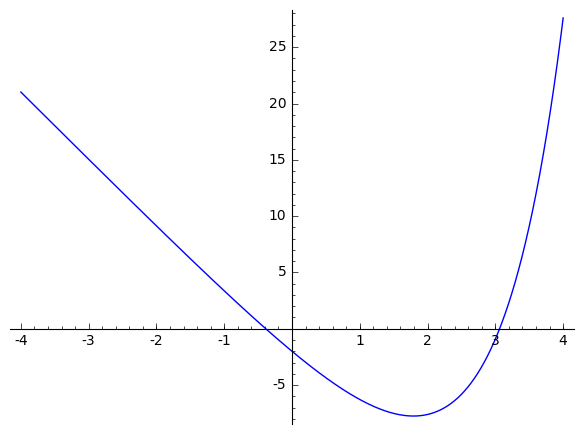

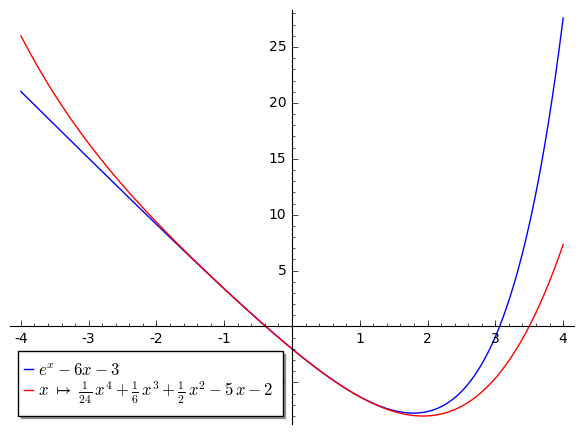

Finding the roots of

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:57: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


x |--> -6*x + e^x - 3

Root bounds:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:63: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


((-4, 4),)

Graph of the function at the interval given by the root bounds:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:65: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


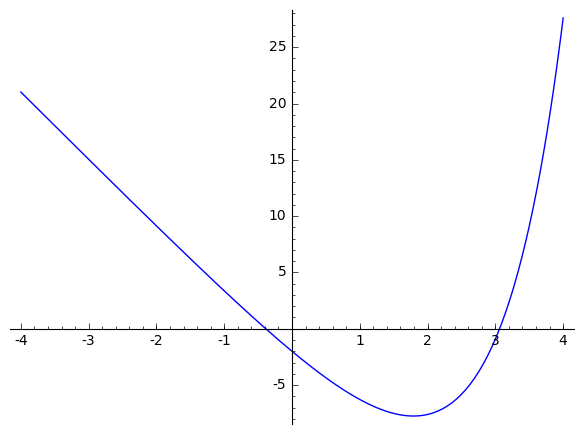

Running Newton's algorithm on

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:71: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


(-0.399999999999998, -0.299999999999998)

0	-0.349999999999998	-0.195311910281299

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:45: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


1	-0.386883929330409	0.000473498041861697

2	-0.386794939824086	2.68929811753083e-9

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:75: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


Running Newton's algorithm on

(3.00000000000000, 3.10000000000000)

0	3.05000000000000	-0.184655577459324

1	3.06221643201091	0.00158207566291679

2	3.06211353198214	1.13159181580613e-7

Roots found:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:78: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


[-0.386794939318652, 3.06211352462109]

Roots calculated by Sage:

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:80: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


'None'

[-0.386794939318652, 3.06211352462109]

In [7]:
P(x) = exp(x) - 6*x - 3
plot(P, -4, 4, figsize=6).show()
Q(x) = taylor(exp(x), x, 0, 4) - 6*x - 3
(plot(P, -4, 4, figsize=6, legend_label='$ e^x - 6x - 3 $') +
 plot(Q, -4, 4, figsize=6, color='red', legend_label='$%s$' % latex(Q))).show()
find_roots(P, bounds=((-4, 4),), verbose=True)